# Importing Libraries

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from scipy import stats

# Loading Dataset

In [2]:
df=pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.shape

(10127, 23)

In [4]:
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

# Data pre-processing

In [6]:
# Removing the last two columns 
df = df.iloc[:, :-2]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [7]:
#dropping the ID column
df = df.drop('CLIENTNUM', axis=1)

# Exploratory Data Analysis

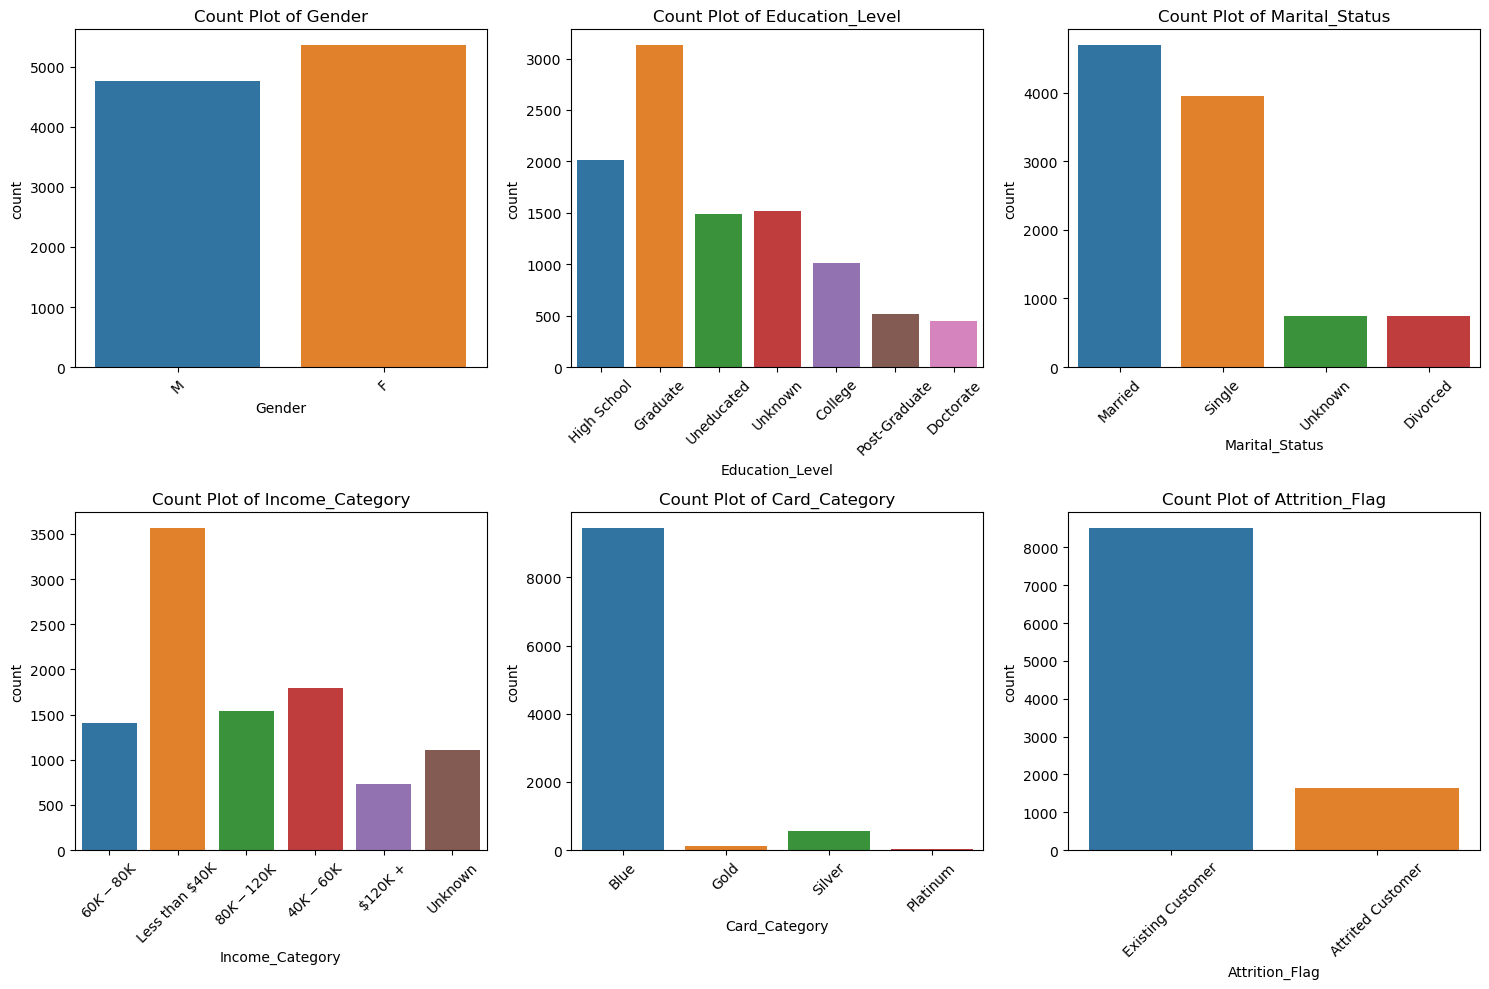

In [8]:
# Assuming df is your DataFrame
categorical_variables = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category','Attrition_Flag']

# Set up the plotting environment
plt.figure(figsize=(15, 10))

# Loop through the categorical variables and create count plots
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=var)
    plt.title(f'Count Plot of {var}')
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

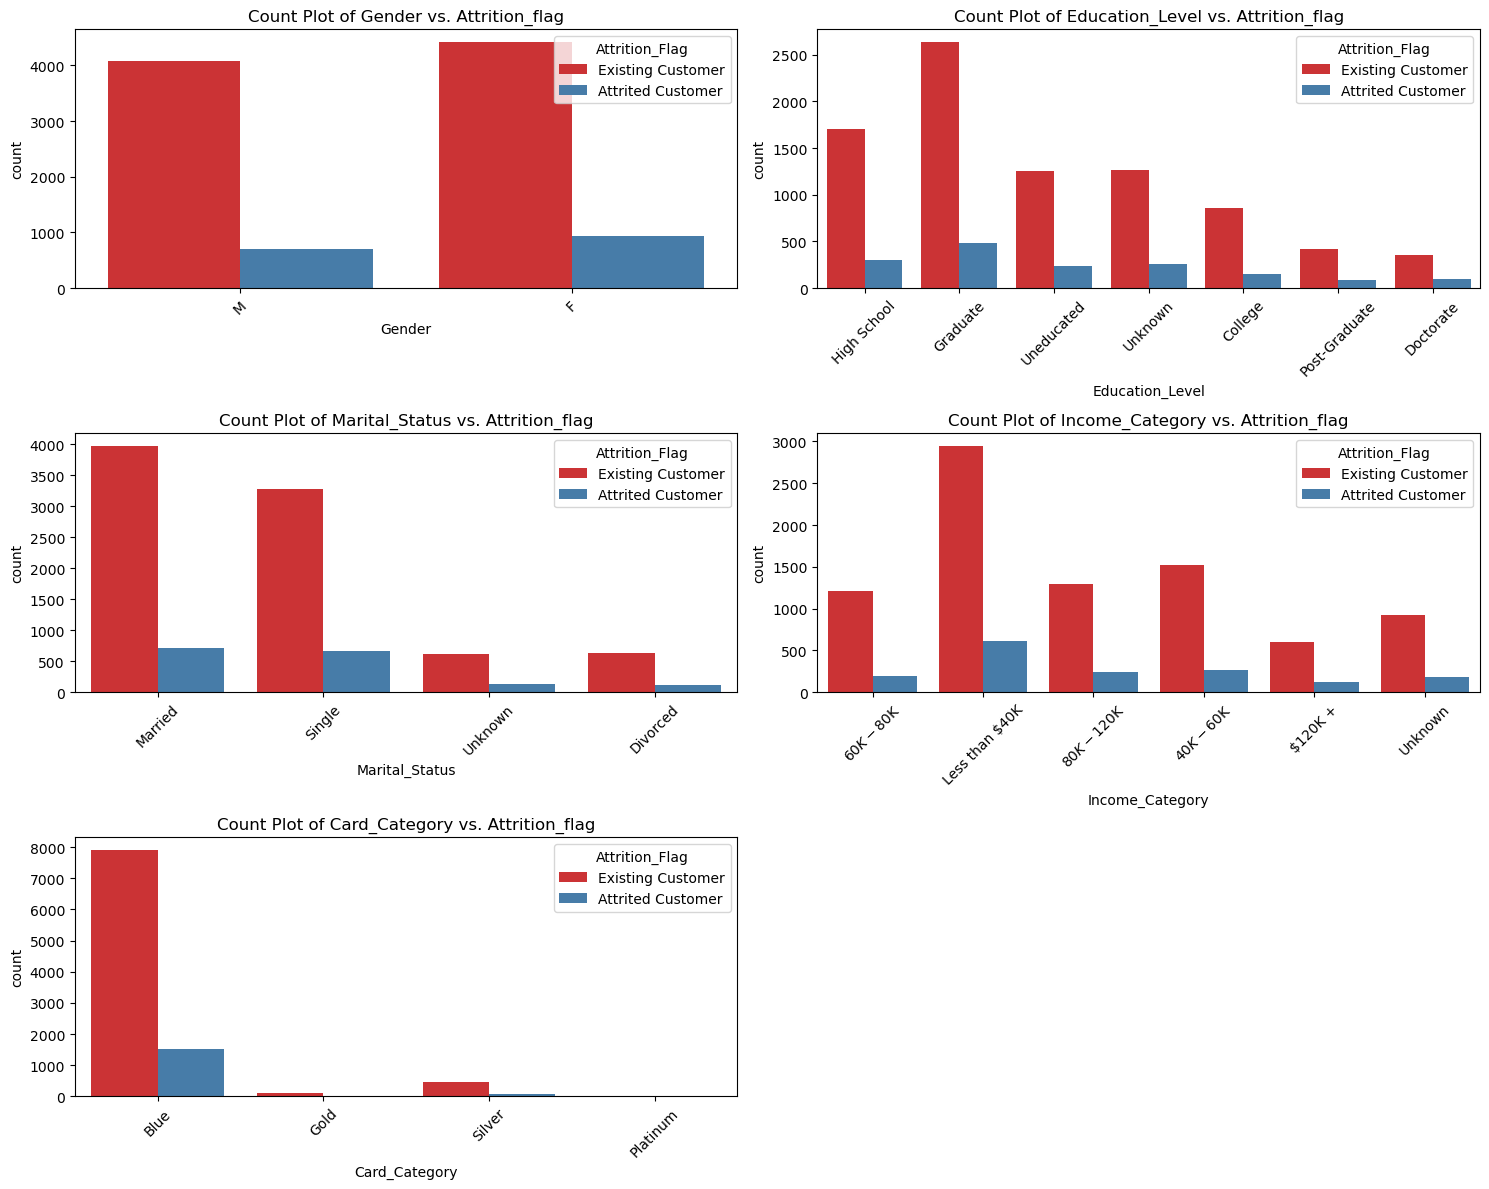

In [9]:
# Assuming df is your DataFrame
categorical_variables = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Set up the plotting environment
plt.figure(figsize=(15, 12))

# Loop through the categorical variables and create grouped count plots
for i, var in enumerate(categorical_variables, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df, x=var, hue='Attrition_Flag', palette='Set1')
    plt.title(f'Count Plot of {var} vs. Attrition_flag')
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

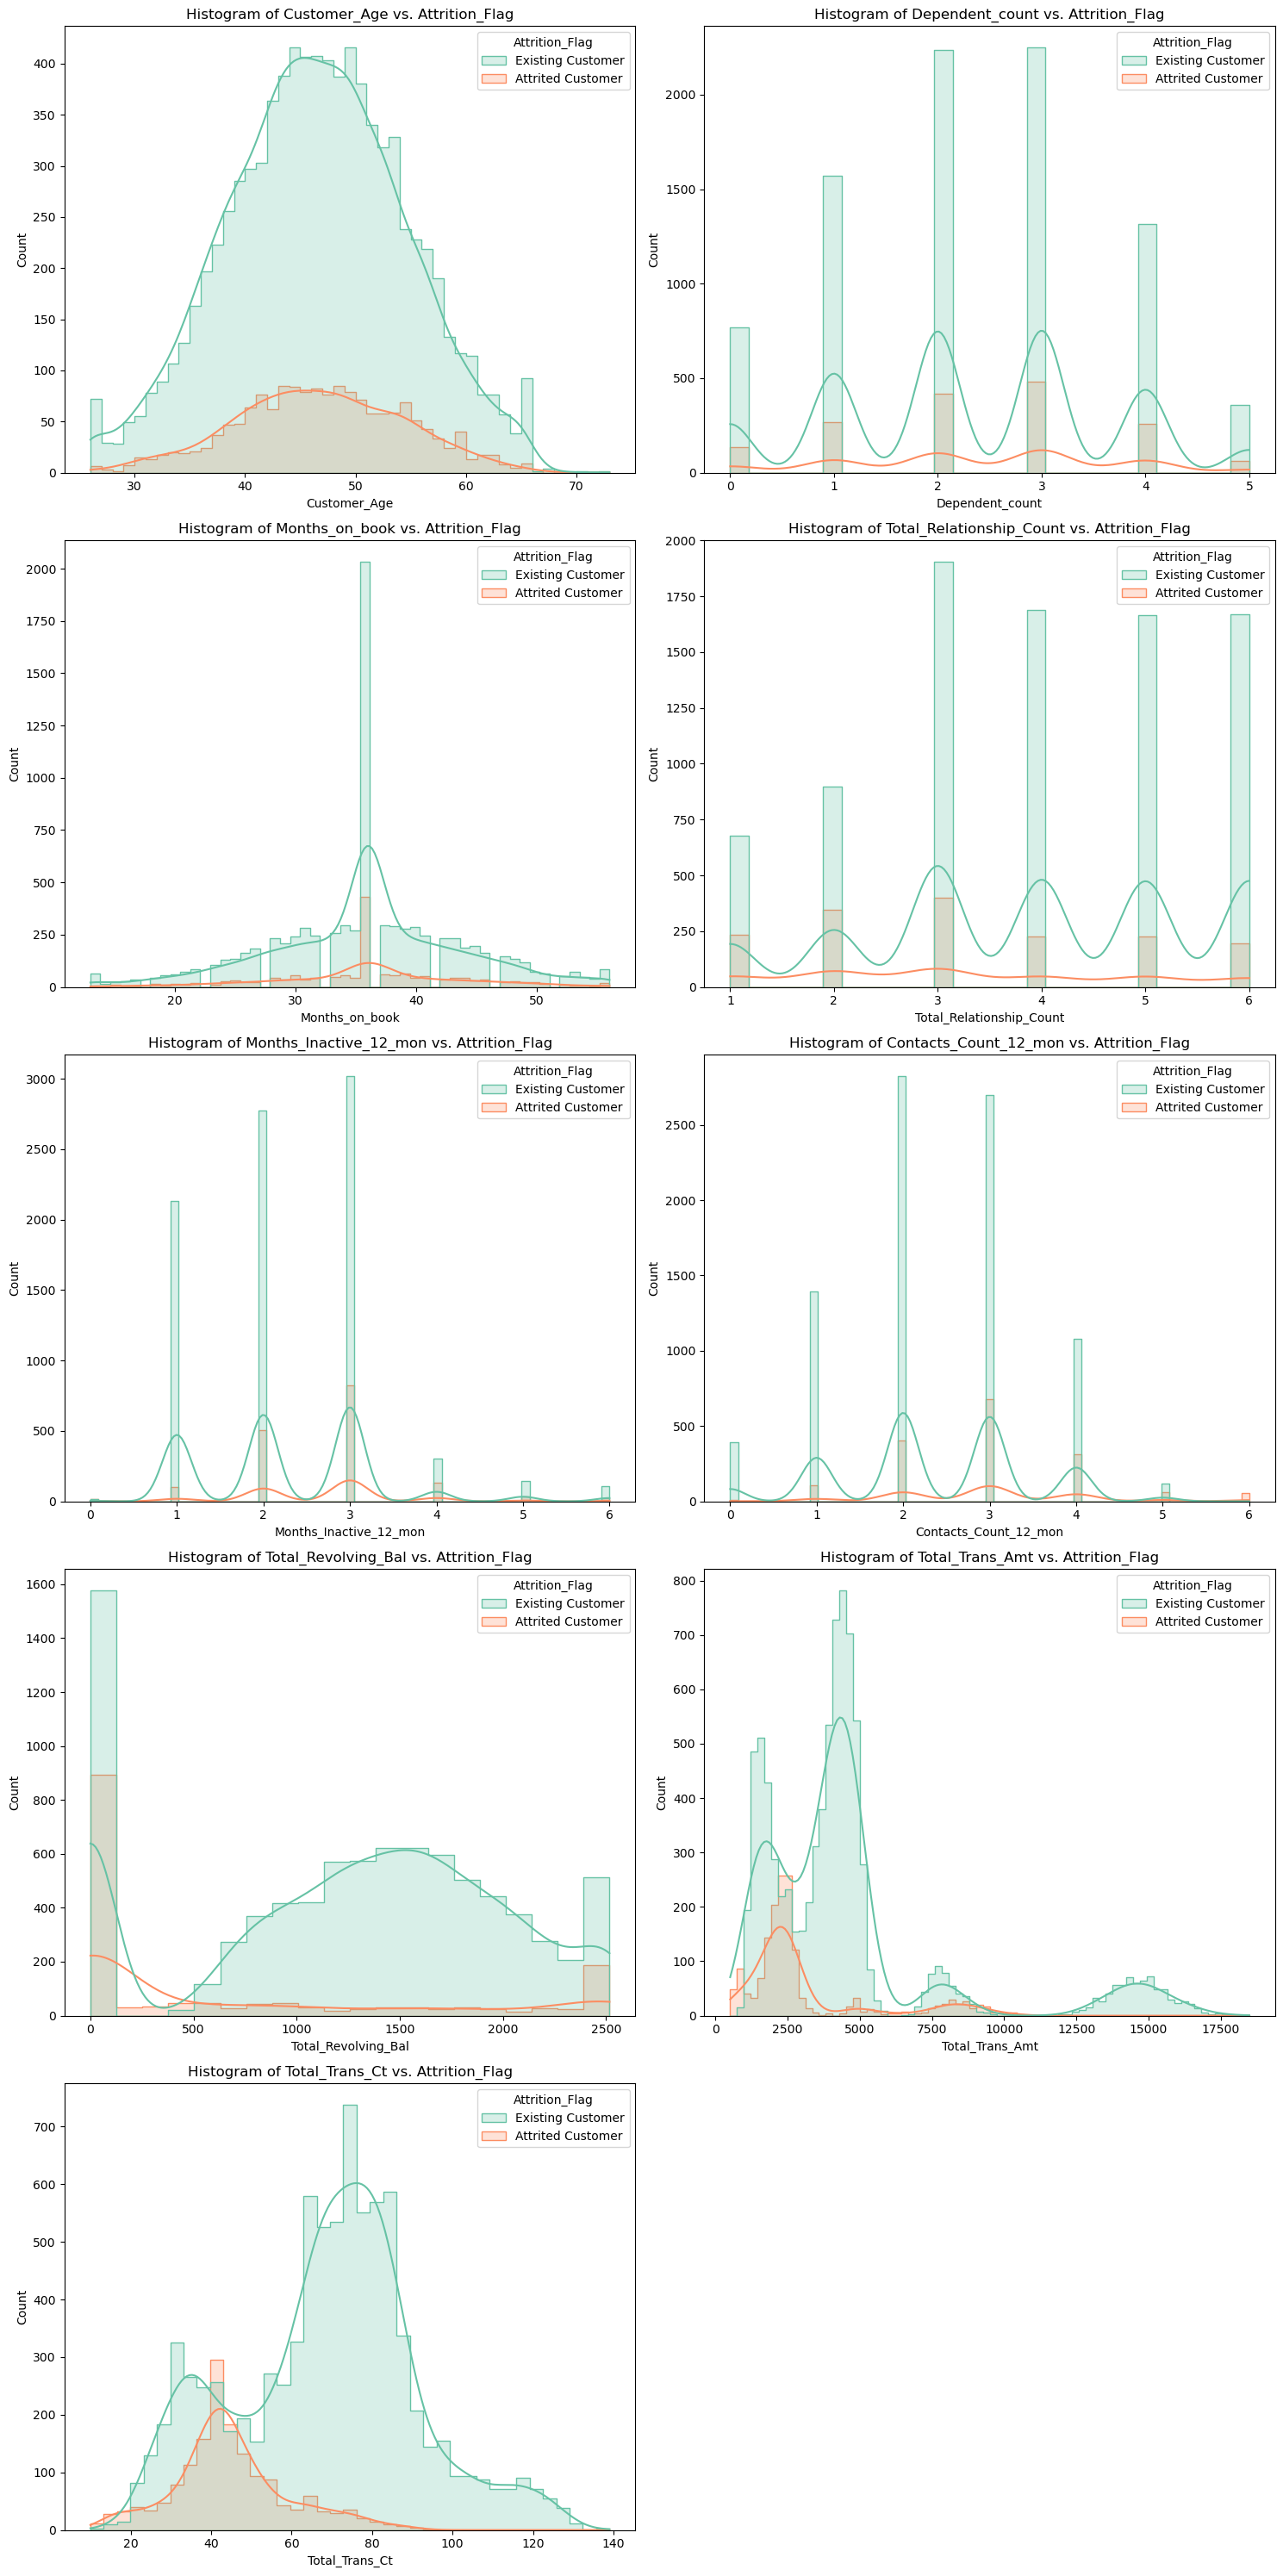

In [10]:
# Assuming df is your DataFrame
int_columns = df.select_dtypes(include=['int64']).columns  # Select all integer columns

# Calculate the number of subplots needed based on the number of integer columns
num_plots = len(int_columns)
rows = (num_plots - 1) // 2 + 1  # Calculate the number of rows

# Set up the plotting environment
plt.figure(figsize=(15, 6 * rows))

# Loop through the integer columns and create histograms against 'Attrition_Flag'
for i, col in enumerate(int_columns, 1):
    plt.subplot(rows, 2, i)
    sns.histplot(data=df, x=col, hue='Attrition_Flag', element='step', common_norm=False, palette='Set2', kde=True)
    plt.title(f'Histogram of {col} vs. Attrition_Flag')

# Adjust layout
plt.tight_layout()
plt.show()

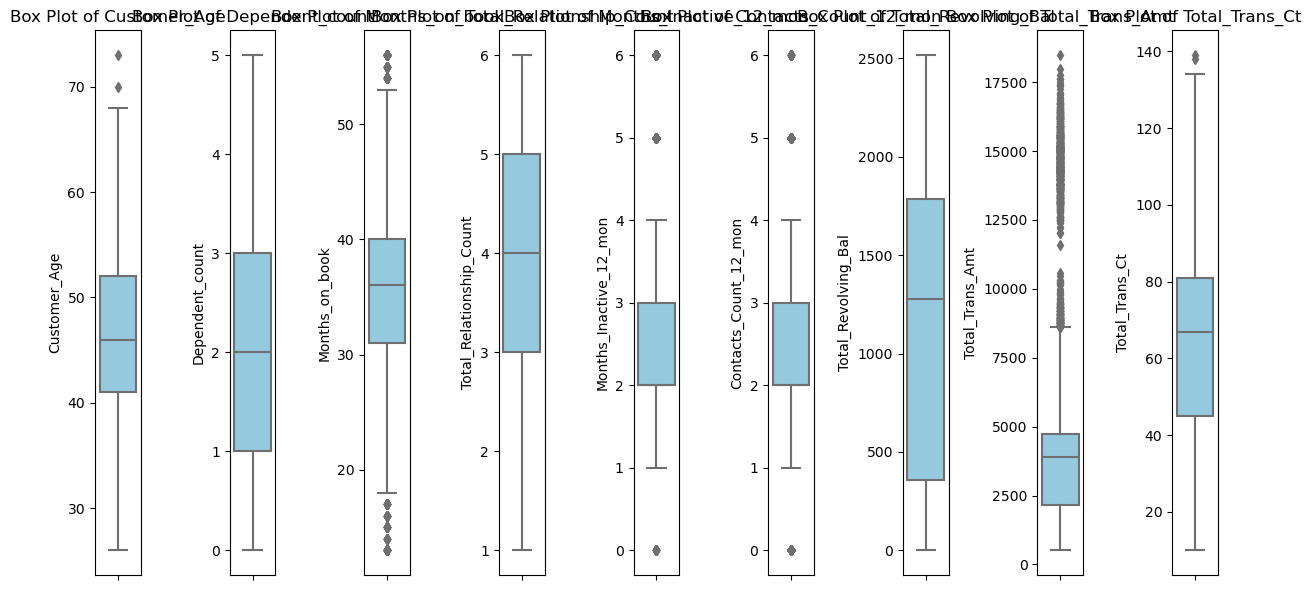

In [11]:
int_columns = df.select_dtypes(include=['int64']).columns

# Set up the plotting environment
plt.figure(figsize=(12, 6))

# Loop through the selected columns and create box plots
for i, col in enumerate(int_columns, 1):
    plt.subplot(1, len(int_columns), i)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f'Box Plot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

In [28]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

In [29]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Initialize the encoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the categorical features
encoded_features = encoder.fit_transform(X[categorical_cols])

X = X.drop(categorical_cols, axis=1)
X = pd.concat([X, pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))], axis=1)

In [30]:
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Create a copy of the DataFrame to preserve the original data
encoded_df = df.copy()

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Iterate through the categorical columns and apply label encoding
for col in categorical_columns:
    encoded_df[col] = label_encoder.fit_transform(encoded_df[col])

encoded_df = encoded_df.drop(categorical_columns, axis=1)

# Display the updated DataFrame
encoded_df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [31]:
# Define the mapping
mapping = {'Existing Customer': 1, 'Attrited Customer': 0}

# Apply the mapping to the 'Attrition_Flag' column
encoded_df['Attrition_Flag'] = encoded_df['Attrition_Flag'].map(mapping)

# Display the updated DataFrame
encoded_df.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Using SMOTE to handle class imbalances for algorithms like NN, NB, and LR 
smote = SMOTE(sampling_strategy=0.7, random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Scale the data for LR
scaler = StandardScaler()
X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Using Machine Learning Algorithms

In [34]:
# Random Forest
random_forest = RandomForestClassifier(random_state=0)
random_forest.fit(X_train, y_train)
rf_y_pred = random_forest.predict(X_test)

# AdaBoost
adaboost = AdaBoostClassifier(random_state=0)
adaboost.fit(X_train, y_train)
ab_y_pred = adaboost.predict(X_test)

# Neural Network with SMOTE 
nn = MLPClassifier(random_state=0)
nn.fit(X_resampled, y_resampled)
nn_y_pred = nn.predict(X_test)

# Naive Bayes with SMOTE
nb = GaussianNB()
nb.fit(X_resampled, y_resampled)
nb_y_pred = nb.predict(X_test)

# Logistic Regression with SMOTE
#lr = LogisticRegression(random_state=0)
#lr.fit(X_resampled, y_resampled)
#lr_y_pred = lr.predict(X_test)

# Logistic Regression after scaling
lr = LogisticRegression(random_state=0, max_iter=1000)
lr.fit(X_resampled_scaled, y_resampled)
lr_y_pred = lr.predict(X_test_scaled)

# Decision Tree
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

# Evaluate and compare the models
print("Random Forest Accuracy: ", accuracy_score(y_test, rf_y_pred))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

print("\nAdaBoost Accuracy: ", accuracy_score(y_test, ab_y_pred))
print("AdaBoost Classification Report:")
print(classification_report(y_test, ab_y_pred))

print("Neural Network Accuracy: ", accuracy_score(y_test, nn_y_pred))
print("Neural Network Classification Report:")
print(classification_report(y_test, nn_y_pred, zero_division=0))

print("\nNaive Bayes Accuracy: ", accuracy_score(y_test, nb_y_pred))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, nb_y_pred, zero_division=0))

print("\nLogistic Regression Accuracy: ", accuracy_score(y_test, lr_y_pred))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_y_pred, zero_division=0))

print("\nDecision Tree Accuracy: ", accuracy_score(y_test, dt_y_pred))
print("Decision Tree Classification Report:")
print(classification_report(y_test, dt_y_pred))

Random Forest Accuracy:  0.9486673247778875
Random Forest Classification Report:
                   precision    recall  f1-score   support

Attrited Customer       0.91      0.75      0.83       327
Existing Customer       0.95      0.99      0.97      1699

         accuracy                           0.95      2026
        macro avg       0.93      0.87      0.90      2026
     weighted avg       0.95      0.95      0.95      2026


AdaBoost Accuracy:  0.9516288252714709
AdaBoost Classification Report:
                   precision    recall  f1-score   support

Attrited Customer       0.88      0.81      0.84       327
Existing Customer       0.96      0.98      0.97      1699

         accuracy                           0.95      2026
        macro avg       0.92      0.89      0.91      2026
     weighted avg       0.95      0.95      0.95      2026

Neural Network Accuracy:  0.8840078973346496
Neural Network Classification Report:
                   precision    recall  f1-score  

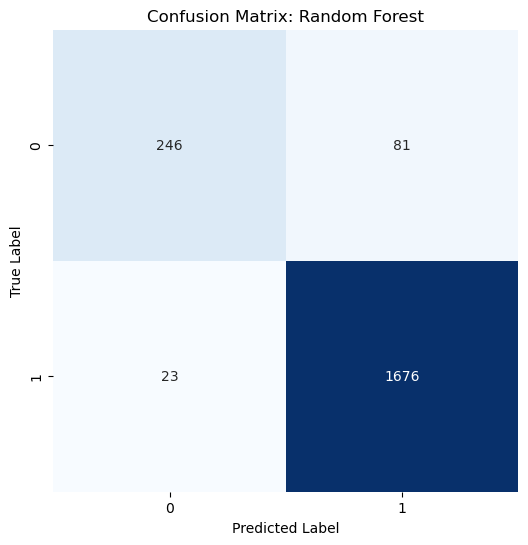

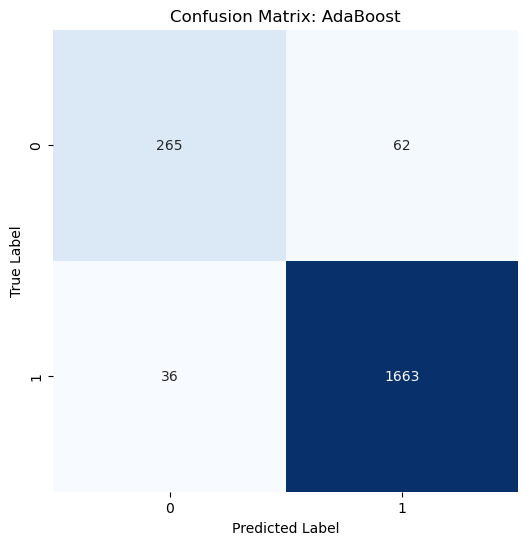

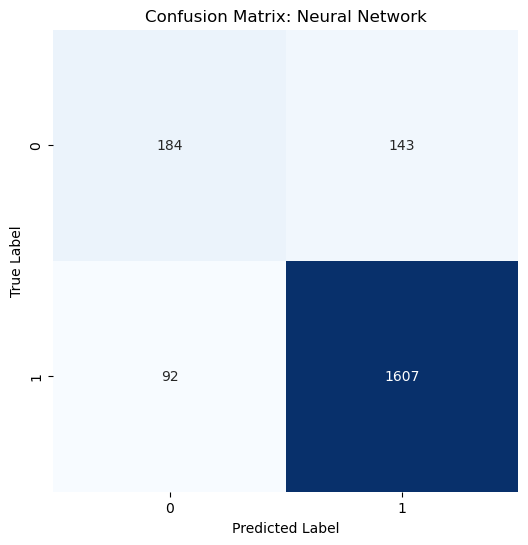

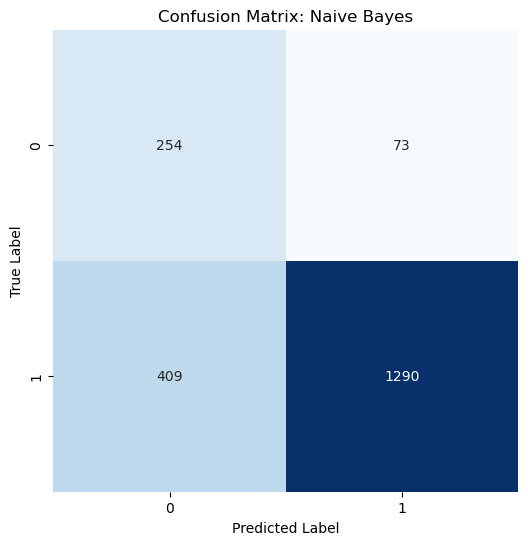

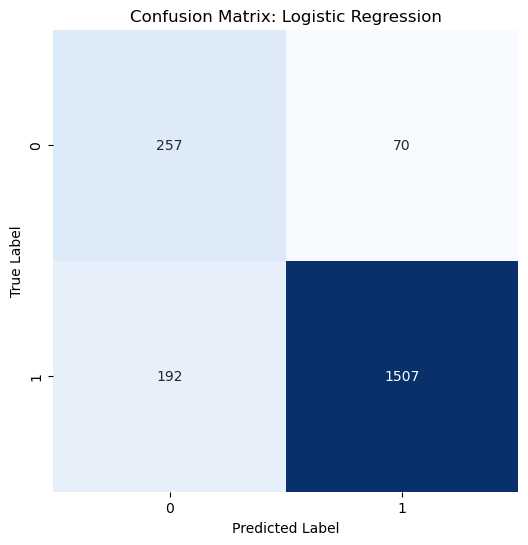

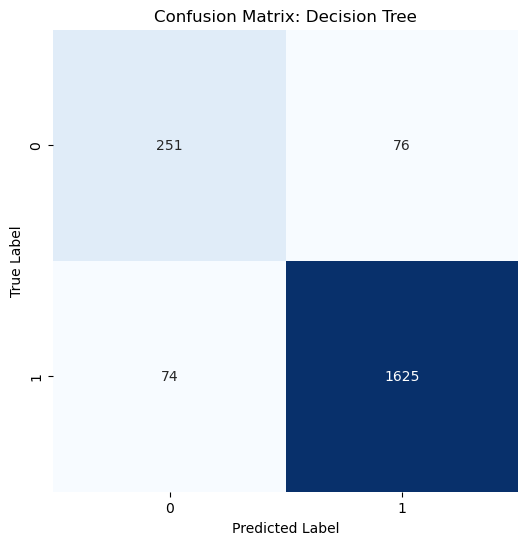

In [18]:
# List of classifiers
classifiers = [random_forest, adaboost, nn, nb, lr, dt]
classifier_names = ['Random Forest', 'AdaBoost', 'Neural Network', 'Naive Bayes', 'Logistic Regression', 'Decision Tree']
predictions = [rf_y_pred, ab_y_pred, nn_y_pred, nb_y_pred, lr_y_pred, dt_y_pred]

for clf, clf_name, y_pred in zip(classifiers, classifier_names, predictions):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {clf_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [19]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from numpy import mean

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10)

# List of models
models = [random_forest, adaboost, nn, nb, lr, dt]
model_names = ['Random Forest', 'AdaBoost', 'Neural Network', 'Naive Bayes', 'Logistic Regression', 'Decision Tree']

for model, name in zip(models, model_names):
    scores = []
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    print(f'{name} Average Accuracy: {mean(scores)}')

Random Forest Average Accuracy: 0.9404536480301534
AdaBoost Average Accuracy: 0.93709552497376
Neural Network Average Accuracy: 0.8429978461814592
Naive Bayes Average Accuracy: 0.8793343647210767


D:\ProgramFile\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Average Accuracy: 0.8666889722149606
Decision Tree Average Accuracy: 0.9071723718146313


Total_Trans_Amt                   0.197028
Total_Trans_Ct                    0.155504
Total_Ct_Chng_Q4_Q1               0.109037
Total_Revolving_Bal               0.098930
Total_Relationship_Count          0.064411
Avg_Utilization_Ratio             0.061420
Total_Amt_Chng_Q4_Q1              0.058365
Credit_Limit                      0.035399
Customer_Age                      0.033561
Avg_Open_To_Buy                   0.032140
Months_Inactive_12_mon            0.025157
Months_on_book                    0.023250
Contacts_Count_12_mon             0.022454
Dependent_count                   0.013458
Gender_F                          0.007456
Gender_M                          0.007185
Marital_Status_Married            0.006774
Marital_Status_Single             0.004460
Education_Level_Graduate          0.004054
Income_Category_Less than $40K    0.003676
Education_Level_High School       0.003185
Education_Level_Unknown           0.003164
Income_Category_$40K - $60K       0.003055
Education_L

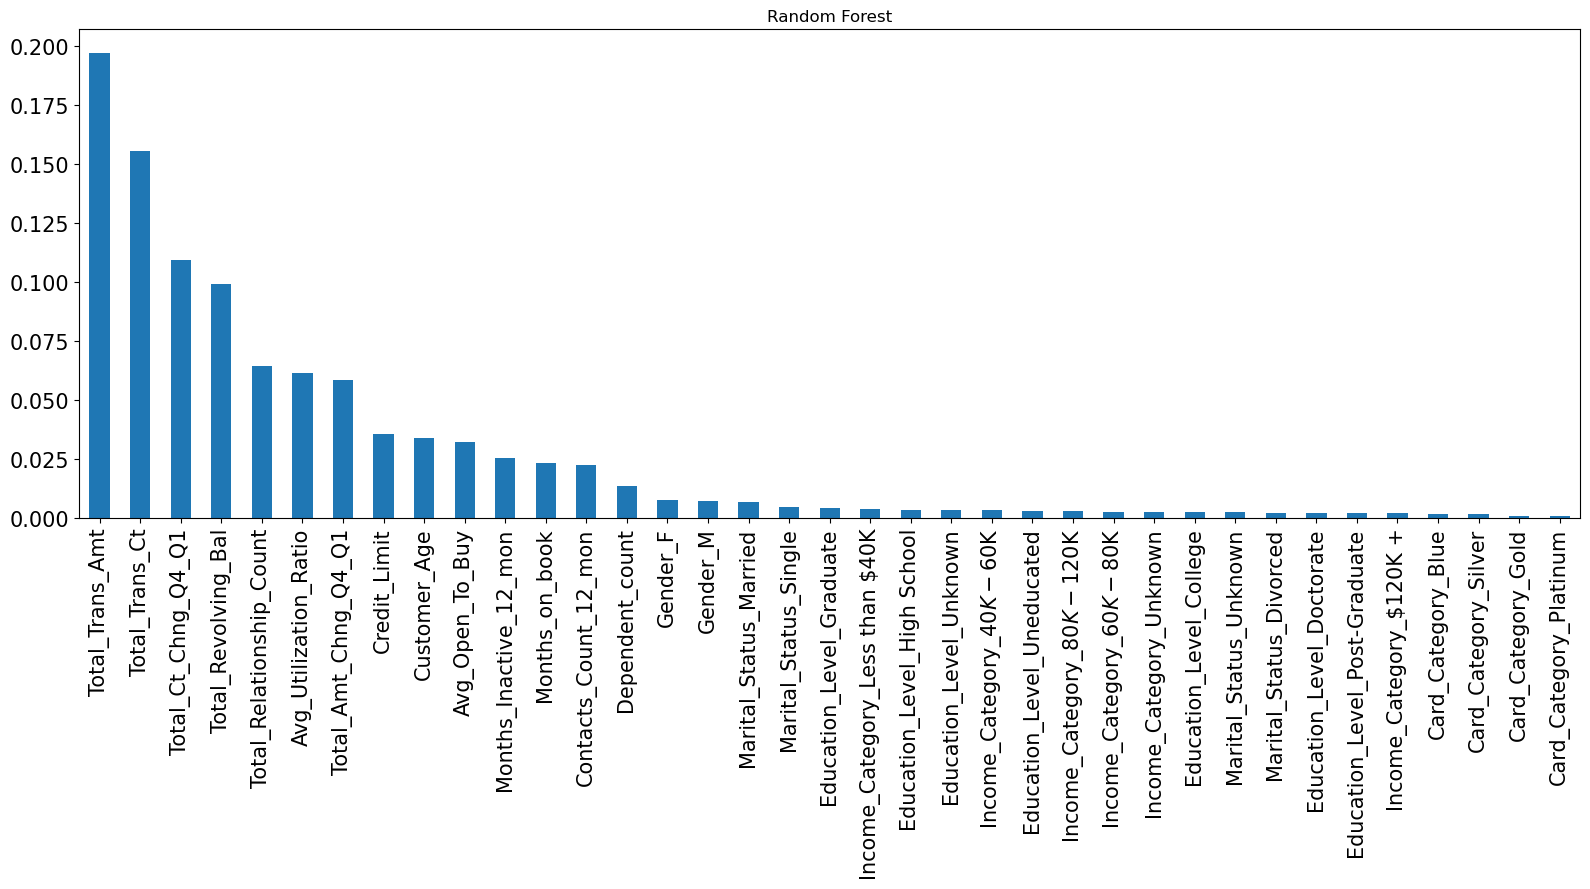

In [20]:
# Get feature importances for Random Forest
importances = random_forest.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=90, fontsize=15)

# Print the feature importances
print(f_importances)

# Show the plot
plt.title("Random Forest")
plt.tight_layout()
plt.show()

Total_Trans_Amt                   0.38
Total_Trans_Ct                    0.16
Total_Amt_Chng_Q4_Q1              0.10
Total_Revolving_Bal               0.06
Total_Ct_Chng_Q4_Q1               0.06
Customer_Age                      0.06
Contacts_Count_12_mon             0.06
Total_Relationship_Count          0.04
Avg_Open_To_Buy                   0.02
Months_Inactive_12_mon            0.02
Marital_Status_Married            0.02
Gender_M                          0.02
Card_Category_Gold                0.00
Income_Category_$60K - $80K       0.00
Marital_Status_Unknown            0.00
Income_Category_$120K +           0.00
Income_Category_$40K - $60K       0.00
Income_Category_Unknown           0.00
Income_Category_$80K - $120K      0.00
Income_Category_Less than $40K    0.00
Card_Category_Blue                0.00
Card_Category_Platinum            0.00
Marital_Status_Single             0.00
Education_Level_Graduate          0.00
Marital_Status_Divorced           0.00
Education_Level_Unknown  

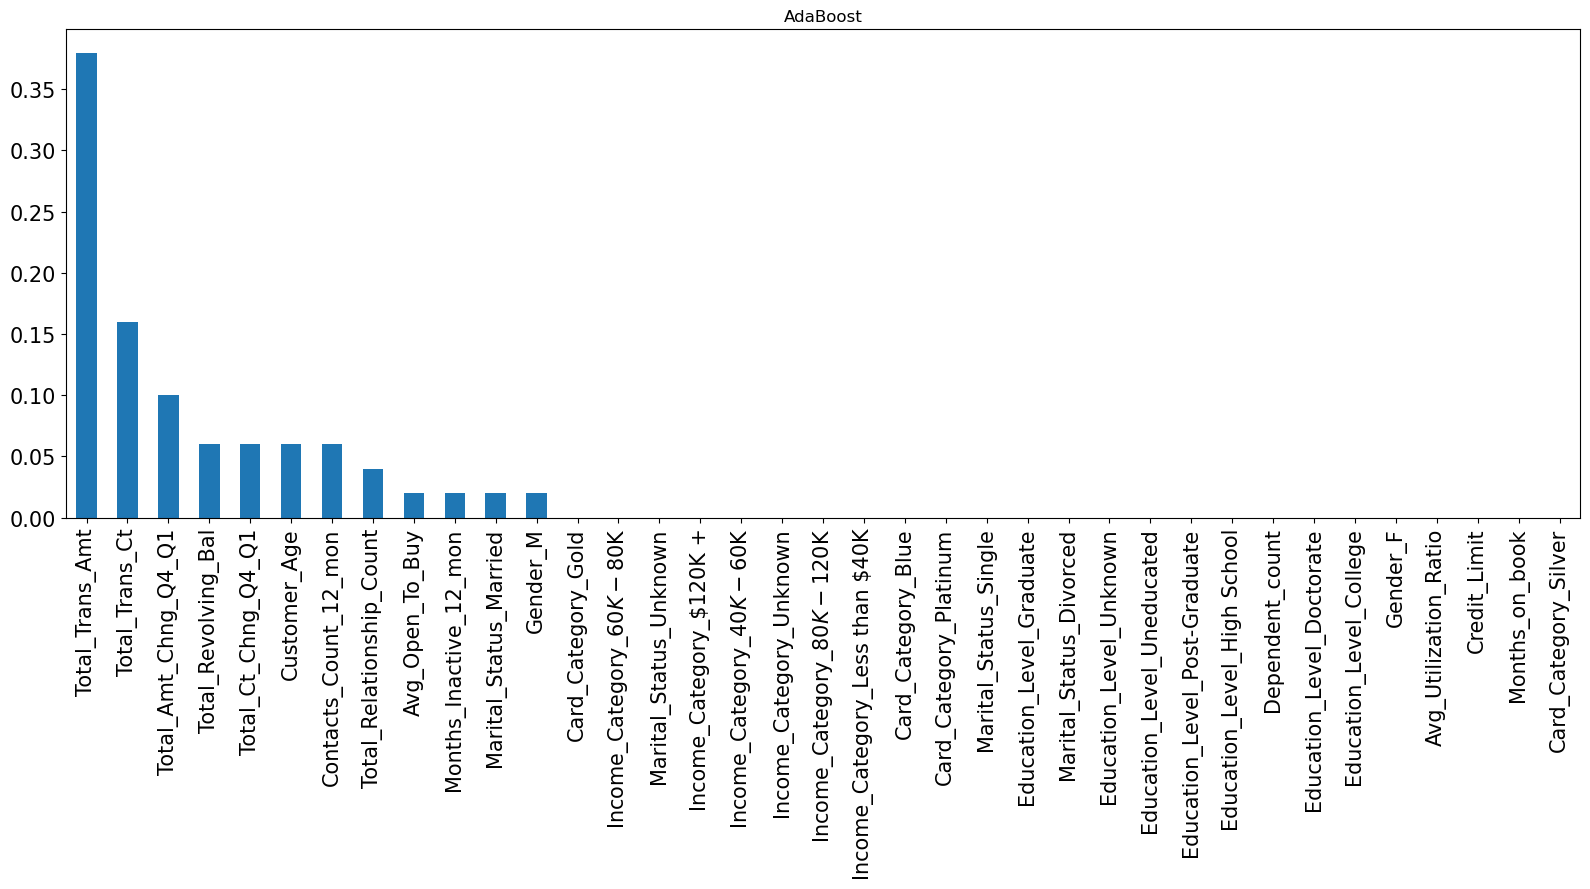

In [21]:
# Get feature importances AdaBoost
importances = adaboost.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=90, fontsize=15)

# Print the feature importances
print(f_importances)

# Show the plot
plt.title("AdaBoost")
plt.tight_layout()
plt.show()

Total_Trans_Ct                    0.262453
Total_Revolving_Bal               0.198610
Total_Trans_Amt                   0.131043
Total_Relationship_Count          0.098678
Total_Ct_Chng_Q4_Q1               0.084130
Total_Amt_Chng_Q4_Q1              0.054020
Customer_Age                      0.043646
Months_Inactive_12_mon            0.022831
Avg_Open_To_Buy                   0.020822
Credit_Limit                      0.013788
Contacts_Count_12_mon             0.012843
Months_on_book                    0.011419
Avg_Utilization_Ratio             0.009338
Dependent_count                   0.005445
Card_Category_Silver              0.004878
Marital_Status_Married            0.004083
Education_Level_College           0.003525
Marital_Status_Divorced           0.003025
Education_Level_Graduate          0.002304
Income_Category_Unknown           0.001975
Marital_Status_Single             0.001960
Income_Category_$40K - $60K       0.001420
Education_Level_Unknown           0.001276
Income_Cate

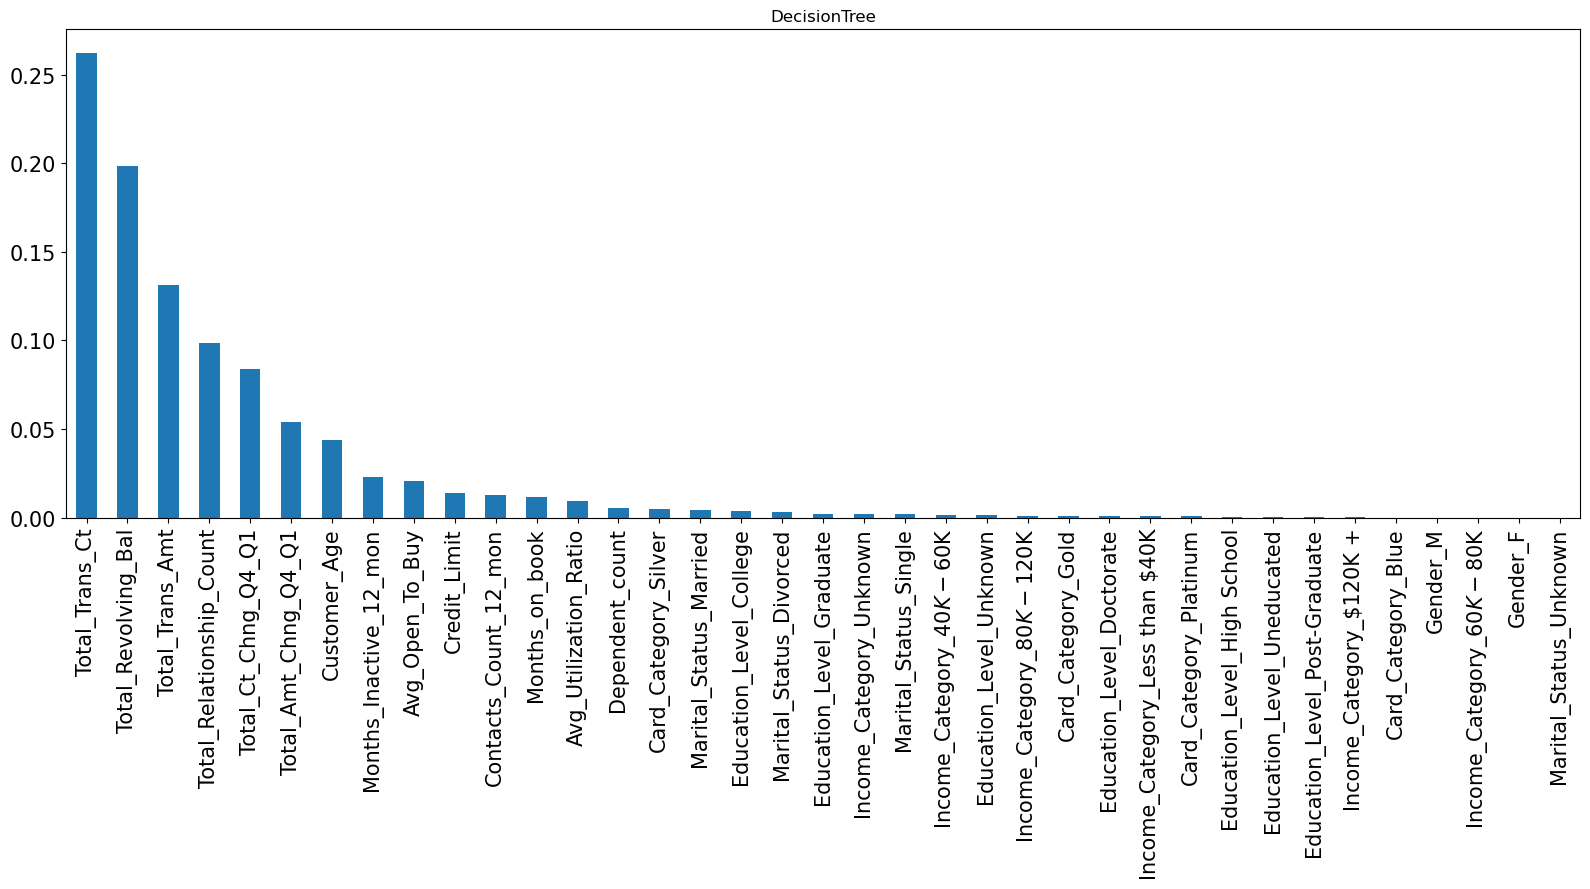

In [22]:
# Get feature importances Decision Tree
importances = dt.feature_importances_

# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

# Make the bar Plot from f_importances 
f_importances.plot(x='Features', y='Importance', kind='bar', figsize=(16,9), rot=90, fontsize=15)
# Print the feature importances
print(f_importances)

# Show the plot
plt.title("DecisionTree")
plt.tight_layout()
plt.show()